In [9]:
import json
import os
from eMammal_helpers import draw_bboxes

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read a database and count number of projects, locations, images, annotations and species

In [2]:
db_path = '/Users/siyuyang/OneDrive - Microsoft/AI4Earth/Camera_trap/databases/eMammal_20180929.json'

In [3]:
db = json.load(open(db_path))

In [4]:
num_images = len(db['images'])
num_images

1758910

In [5]:
db['annotations'][:2]

[{'bbox': [0.6716216378845276,
   0.4442567675141618,
   0.32837836211547244,
   0.2500000060535968],
  'category_id': 1,
  'id': '9HgP51535638006333',
  'image_id': 'datasetemammal.projectp135.deploymentd20629.seqd20629s13.imgd20629s13i1'},
 {'bbox': [0.47457075119018555,
   0.4748467803001404,
   0.5094805717468261,
   0.3772698640823364],
  'category_id': 1,
  'id': 'HL5hk1535638020630',
  'image_id': 'datasetemammal.projectp135.deploymentd20629.seqd20629s13.imgd20629s13i2'}]

In [7]:
images = []
for anno in db['annotations']:
    images.append(anno['image_id'])
images = set(images)
num_images_w_bbox = len(images)
num_images_w_bbox

26384

In [14]:
db['images'][-1]

{'datetime': '2011-03-26 18:00:39',
 'file_name': 'p135d20629/d20629s9i9.JPG',
 'frame_num': 9,
 'height': 1024,
 'id': 'datasetemammal.projectp135.deploymentd20629.seqd20629s9.imgd20629s9i9',
 'label': 'sambar',
 'location': 'HKK101',
 'seq_id': 'd20629s9',
 'seq_num_frames': 18,
 'width': 1280}

In [9]:
camera_locations = []

for im in db['images']:
    camera_locations.append(im['location'])
camera_locations = set(camera_locations)
num_camera_locations = len(camera_locations)
num_camera_locations

3264

In [12]:
projects = []
for im_id in images:
    parts = im_id.split('.')
    projects.append(parts[1])
projects = set(projects)
num_projects = len(projects) # substitutes for number of regions
num_projects

17

In [13]:
projects

{'project3062',
 'project3191',
 'project4180',
 'projectp100',
 'projectp101',
 'projectp104',
 'projectp117',
 'projectp122',
 'projectp125',
 'projectp126',
 'projectp135',
 'projectp139',
 'projectp158',
 'projectp166',
 'projectp168',
 'projectp193',
 'projectp195'}

## Species

In [16]:
species = []
for im in db['images']:
    species.extend(im['label'].split(';'))
species = set(species)
num_species = len(species)
num_species

193

In [18]:
species

{'american badger',
 'american beaver',
 'american black bear',
 'american crow',
 'american hog-nosed skunk',
 'american marten',
 'american red squirrel',
 'american robin',
 'animal not on list',
 'appalachian cottontail',
 'asian elephant',
 'asian small-clawed otter',
 'asiatic black bear',
 'asiatic brush-tailed porcupine',
 'asiatic golden cat',
 'banteng',
 'black vulture',
 'black-eared opossum',
 'blood pheasant',
 'blue eared pheasant',
 'blue eared-pheasant',
 'blue jay',
 'blue magpie',
 'bobcat',
 'brown palm civet',
 'canada lynx',
 'cattle egret',
 'central american agouti',
 'chestnut-throated partridge',
 'chinese bamboo rat',
 'chinese goral',
 'chinese grouse',
 'chinese serow',
 'chital',
 'collared peccary',
 "collie's squirrel",
 'common palm civet',
 'common raven',
 'coral-billed ground cuckoo',
 'coyote',
 'crab-eating fox',
 'crab-eating macaque',
 'crab-eating mongoose',
 'crab-eating raccoon',
 'dhole',
 'domestic cat',
 'domestic cattle',
 'domestic chicke

In [21]:
'human' in species

True

# Visualize bounding boxes

In [4]:
db_path = '/home/yasiyu/yasiyu_temp/eMammal_db/eMammal_20181126.json'
db = json.load(open(db_path))
annotations = db['annotations']
images = db['images']

In [11]:
img_props = {
    i['id']: {'file_name': i['file_name'], 'w': i['width'], 'h': i['height']} for i in images
}

In [8]:
img_dir = '/datadrive/emammal'

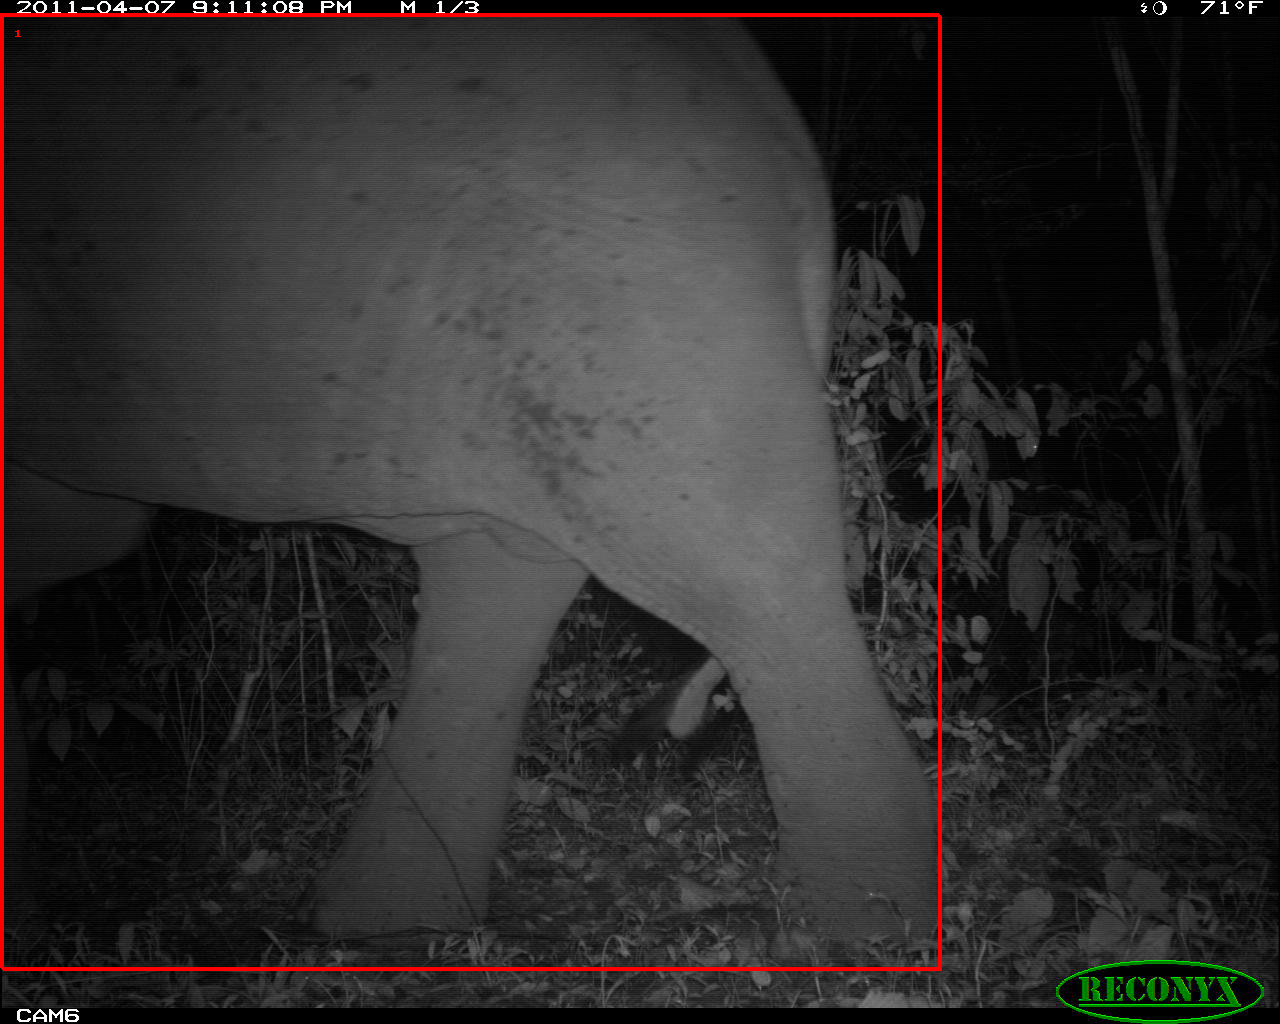

In [15]:
# This only visualizes one bounding box (even if this image had more)

anno = annotations[16]
img_id = anno['image_id']
img_path = os.path.join(img_dir, img_id_to_file_name[img_id])

x, y, w, h = anno['bbox']
im_width, im_height = img_props[img_id]['w'], img_props[img_id]['h']
x = x / im_width
y = y / im_height
w = w / im_width
h = h / im_height

draw_bboxes(img_path, [[x, y, w, h]], [anno['category_id']], show_label=True)